<a href="https://colab.research.google.com/github/dayanaviana/WGU/blob/main/207-DataExploration_Project/CHURN_1_UnivariateAnalisys_QualitativeData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Univariate Analisys for Qualitative Variables


# Descriptive Statistics
Describe and summarize data



Churn
Chi-square test:  Power_divergenceResult(statistic=2209.0, pvalue=0.0)
Categories have DIFFERENT distribution
  Category  Count  Percentage
0       No   7350       0.735
1      Yes   2650       0.265




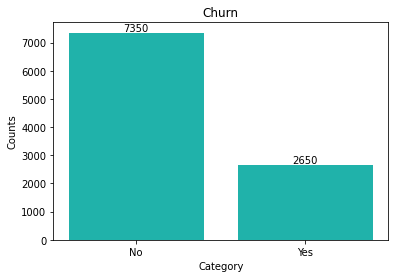



City
Chi-square test:  Power_divergenceResult(statistic=11486.5144, pvalue=0.0)
Categories have DIFFERENT distribution
          Category  Count  Percentage
0          Houston     34      0.0034
1         New York     24      0.0024
2      Springfield     23      0.0023
3          Buffalo     23      0.0023
4      San Antonio     22      0.0022
...            ...    ...         ...
6053    Cottontown      1      0.0001
6054     San Dimas      1      0.0001
6055     Fort Hill      1      0.0001
6056       Webster      1      0.0001
6057  Clarkesville      1      0.0001

[6058 rows x 3 columns]




In [ ]:
# Source code: 

from operator import index
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# import into data frame
churn = "https://raw.githubusercontent.com/dayanaviana/WGU/main/datasources/churn_clean.csv"
df = pd.read_csv(churn, index_col=0)

categorical_columns_array = ["Churn","City","State","County","Area","Marital",
"Gender","Techie","InternetService","Multiple","OnlineBackup","DeviceProtection",
"StreamingTV","StreamingMovies","Port_modem","Tablet","OnlineSecurity","TechSupport",
"Contract","PaperlessBilling","PaymentMethod","TimeZone","Item1","Item2","Item3",
"Item4","Item5","Item6","Item7","Item8","Job",]

for column_name in categorical_columns_array:
  print("\n")
  print(column_name)

  sample = df.loc[:, column_name]
  categories = np.unique(sample)
  categories_counts = sample.value_counts()
  percentages = df[column_name].value_counts(dropna=False, normalize=True)

  #Performing Chi-square test
  # H0: NO statistic significant difference between groups
  # H1: Correlation exists
  chisquareResult = stats.chisquare(categories_counts)
  print("Chi-square test: ", chisquareResult)
  statistic, pValue = chisquareResult

  #Interpret p-value
  #P-value is the probability of H0 being true
  alpha = 0.05
  if pValue <= alpha:
    h0 = False # Reject H0
  else:
    h0 = True # Accept H0

  if (h0):
    print("Categories have SAME distribution")
  else:
    print("Categories have DIFFERENT distribution")
  
  # Build DF for Bar graph
  # custom_index = ['Row'+str(i) for i in range(1, len(categories_counts.values)+1)]
  custom_df = pd.DataFrame(categories_counts)
  custom_df['Percentage'] = percentages
  # Transfrom index as a column
  custom_df.reset_index(level=0, inplace=True)
  # Rename columns
  custom_df.rename(columns = {list(custom_df)[0]:'Category'}, inplace=True)
  custom_df.rename(columns = {list(custom_df)[1]:'Count'}, inplace=True)
  print(custom_df)
  print("\n")

  # Bar Graph
  # https://medium.com/@jb.ranchana/easy-way-to-create-stacked-bar-graphs-from-dataframe-19cc97c86fe3

  bar_graph = plt.bar(x=custom_df['Category'], 
        height=custom_df['Count'],
        color='lightseagreen', #https://matplotlib.org/3.1.0/gallery/color/named_colors.html
        #width = 0.5
        )
  plt.ylabel("Counts")
  plt.xlabel("Category")
  plt.title(column_name)

  # Add counts above the graph
  for rect in bar_graph:
      x = rect.get_x()
      height = rect.get_height()
      plt.text(x=rect.get_x() + rect.get_width() / 2, y=height+.10,
      s="{}".format(height),
      ha='center', 
      va='bottom')

  plt.show()
